<a href="https://colab.research.google.com/github/nachokreutzer/Data_Science_I/blob/main/ProyectoDS_ParteI_Kreutzer_Ignacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrega I**
# Data Science I
### Fecha: 19/06/2024

## Objetivos:

### Consigna

Continuarás trabajando con base en lo realizado en la actividades práctica: Visualización en Python, en esta oportunidad deberás complementar con lo siguiente:

1.   Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
2.   Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
3.  Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
4.  Identificar valores perdidos.




#Abstracto



El objetivo de este proyecto es analizar y visualizar datos del mercado inmobiliario del condado de King. Mediante el uso de bibliotecas de Python como Pandas, Matplotlib y Seaborn, se han desarrollado diversas visualizaciones que nos permiten entender mejor las variables que influyen en los precios de las casas (variable a predecir). A través de este análisis, se busca responder a preguntas clave y validar hipótesis sobre las características de las propiedades y su impacto en el precio de venta.
El análisis inicial sugiere que variables como el tamaño de la casa en metros cuadrados y la condición general de la propiedad tienen una relación significativa con el precio de venta. Además, se han identificado patrones interesantes en función del precio en relacion con las casas con vista al agua como tambien la inferencia del numero de habitaciones.
Se han creado visualizaciones han permitido realizar un diagnóstico detallado de los datos y obtener insights valiosos.
Estas visualizaciones no solo ayudan a validar nuestras hipótesis iniciales, sino que también plantean nuevas preguntas sobre el mercado inmobiliario del condado de King. Por ejemplo, se ha planteado la hipótesis de que las casas con mayor calificación y mejor condición tienen precios superiores, lo cual ha sido parcialmente confirmado.
En resumen, este análisis proporciona una base sólida para comprender las dinámicas del mercado inmobiliario en el condado de King y abre la puerta a estudios más profundos y específicos en el futuro.


 Dataset fue tomado de :[ https://www.kaggle.com/datasets/harlfoxem/housesalesprediction ]


Hipótesis específicas:
1. Las casas con vista al agua tienen un precio significativamente mayor que aquellas sin vista.
2. El número de habitaciones no es un indicador tan fuerte del precio como lo son los metros cuadrados de la casa.
3. Las casas con mejor calificación y condición tienen precios de venta superiores.

### Diccionario de datos "Variables"

id : numero de identificacion de la casa

date: fecha de venta

price: precio

bedrooms: cuartos

bathrooms: baños

sqft_living: metros cuadrados casa

sqft_lot: metros cuadrados lote

floors : pisos o niveles o plantas

waterfront : vista al agua

view: si ya tuvo vistas

condition : condicion de la casa del 1 al 5

grade: Calificación general otorgada a la unidad de vivienda, según el sistema de calificación del condado de King

sqft_above : Metros cuadrados de la casa sin contar el sotano

sqft_basement: Metros cuadrados del sotano

yr_built : año de construccion

yr_renovated : año de renovacion

zipcode: codigo postal

lat: latitud coordenada

long: longitud coordenada

sqft_living15 : Área de la sala de estar en 2015 (implica algunas renovaciones) Esto podría haber afectado o no el área del lote.

sqft_lot15 : Superficie del lote en 2015 (implica algunas renovaciones)

# Import Librerias

In [18]:
# Importación pandas para la estrcuturación de datos
import pandas as pd

# Importación NumPy para funcones matematica
import numpy as np

# Importación Matplotlib para la visualización
import matplotlib.pyplot as plt

# Importación de Seaborn para visualización avanzada
import seaborn as sns

In [3]:
#Import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import dataset y decripción

In [4]:
#Import dataset
df = pd.read_csv("/content/drive/MyDrive/Data Science Proyecto Coder House/kc_house_data.csv")

In [5]:
#primeras 5 filas
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#ultimas 5 filas
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
#Dimension de nuestro dataset de filas y columnas
df.shape

(21613, 21)

In [8]:
#tipo de datos de los campos
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
#Usamos el info para ver si encontramos todos datos no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
#Usamos el isnull para ver si encontramos todos datos nulos
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64



*   Podemos ver que no hay datos nulos en el dataset




In [11]:
# Utilizamos el método describe para hacer un resumen de analisis estadistico del df
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


#Matplotlib


###Histograma

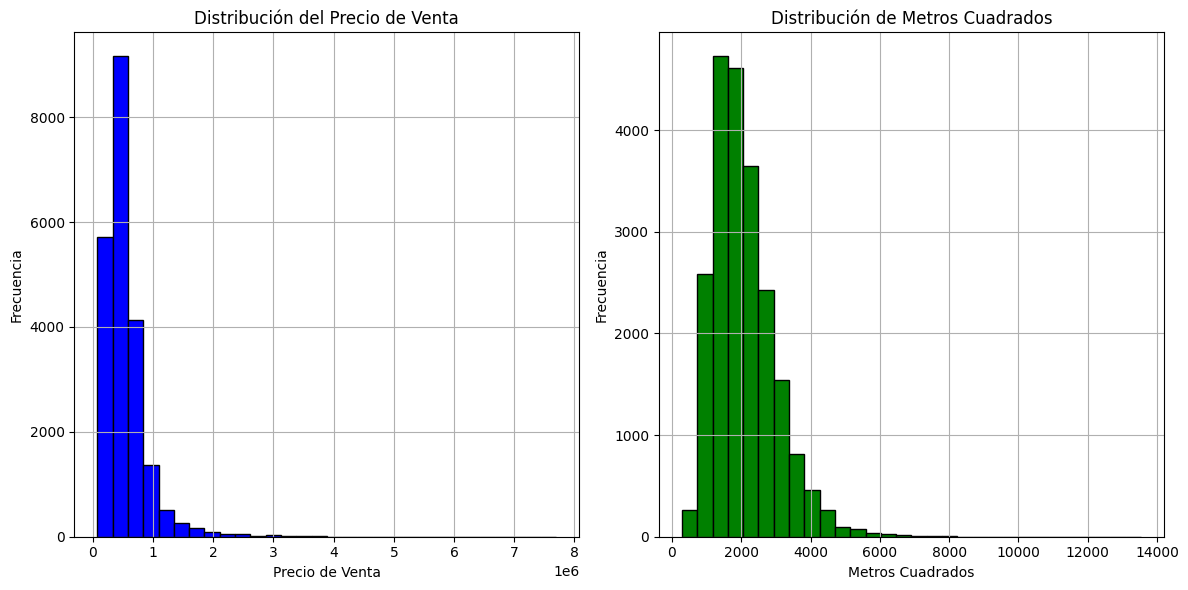

In [12]:
#dimension de los 2 graficos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Histograma del precio de venta de las casas.
plt.hist(df['price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.subplot(1, 2, 2)
# Histograma de los metros cuadrados de las casas.
plt.hist(df['sqft_living'], bins=30, color='green', edgecolor='black')
plt.title('Distribución de Metros Cuadrados')
plt.xlabel('Metros Cuadrados')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.tight_layout()
plt.show()

El primer grafico muestra la distribución de precios, indicando que la mayoría de las casas se venden por menos de 1 millón de dólares, con una cola larga hacia precios más altos.
El segundo grafico revela que la mayoría de las casas tienen entre 1000 y 3000 pies cuadrados, con pocas casas extremadamente grandes.

###Boxplot

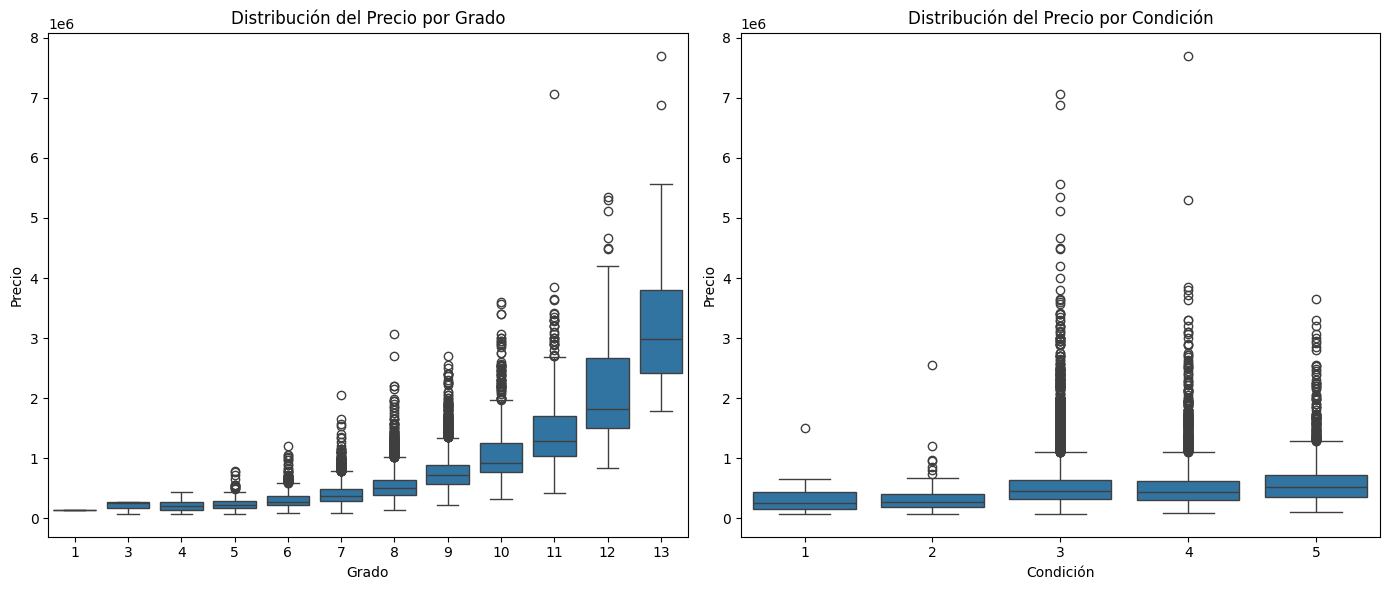

In [13]:
#dimension de los 2 graficos
plt.figure(figsize=(14, 6))

#grafico 1
plt.subplot(1, 2, 1)
sns.boxplot(x='grade', y='price', data=df)
plt.title('Distribución del Precio por Grado')
plt.xlabel('Grado')
plt.ylabel('Precio')

#grafico 2
plt.subplot(1, 2, 2)
sns.boxplot(x='condition', y='price', data=df)
plt.title('Distribución del Precio por Condición')
plt.xlabel('Condición')
plt.ylabel('Precio')

plt.tight_layout()
plt.show()

Grado iene una relación más fuerte y clara con el precio. Las casas con grados más altos tienen precios significativamente más altos y mayor variabilidad en los precios.
Condición tiene una relación positiva con el precio, pero la diferencia de precios entre las condiciones no es tan pronunciada como entre los grados. La variabilidad de precios dentro de cada condición es menor.

###Scatter subplot

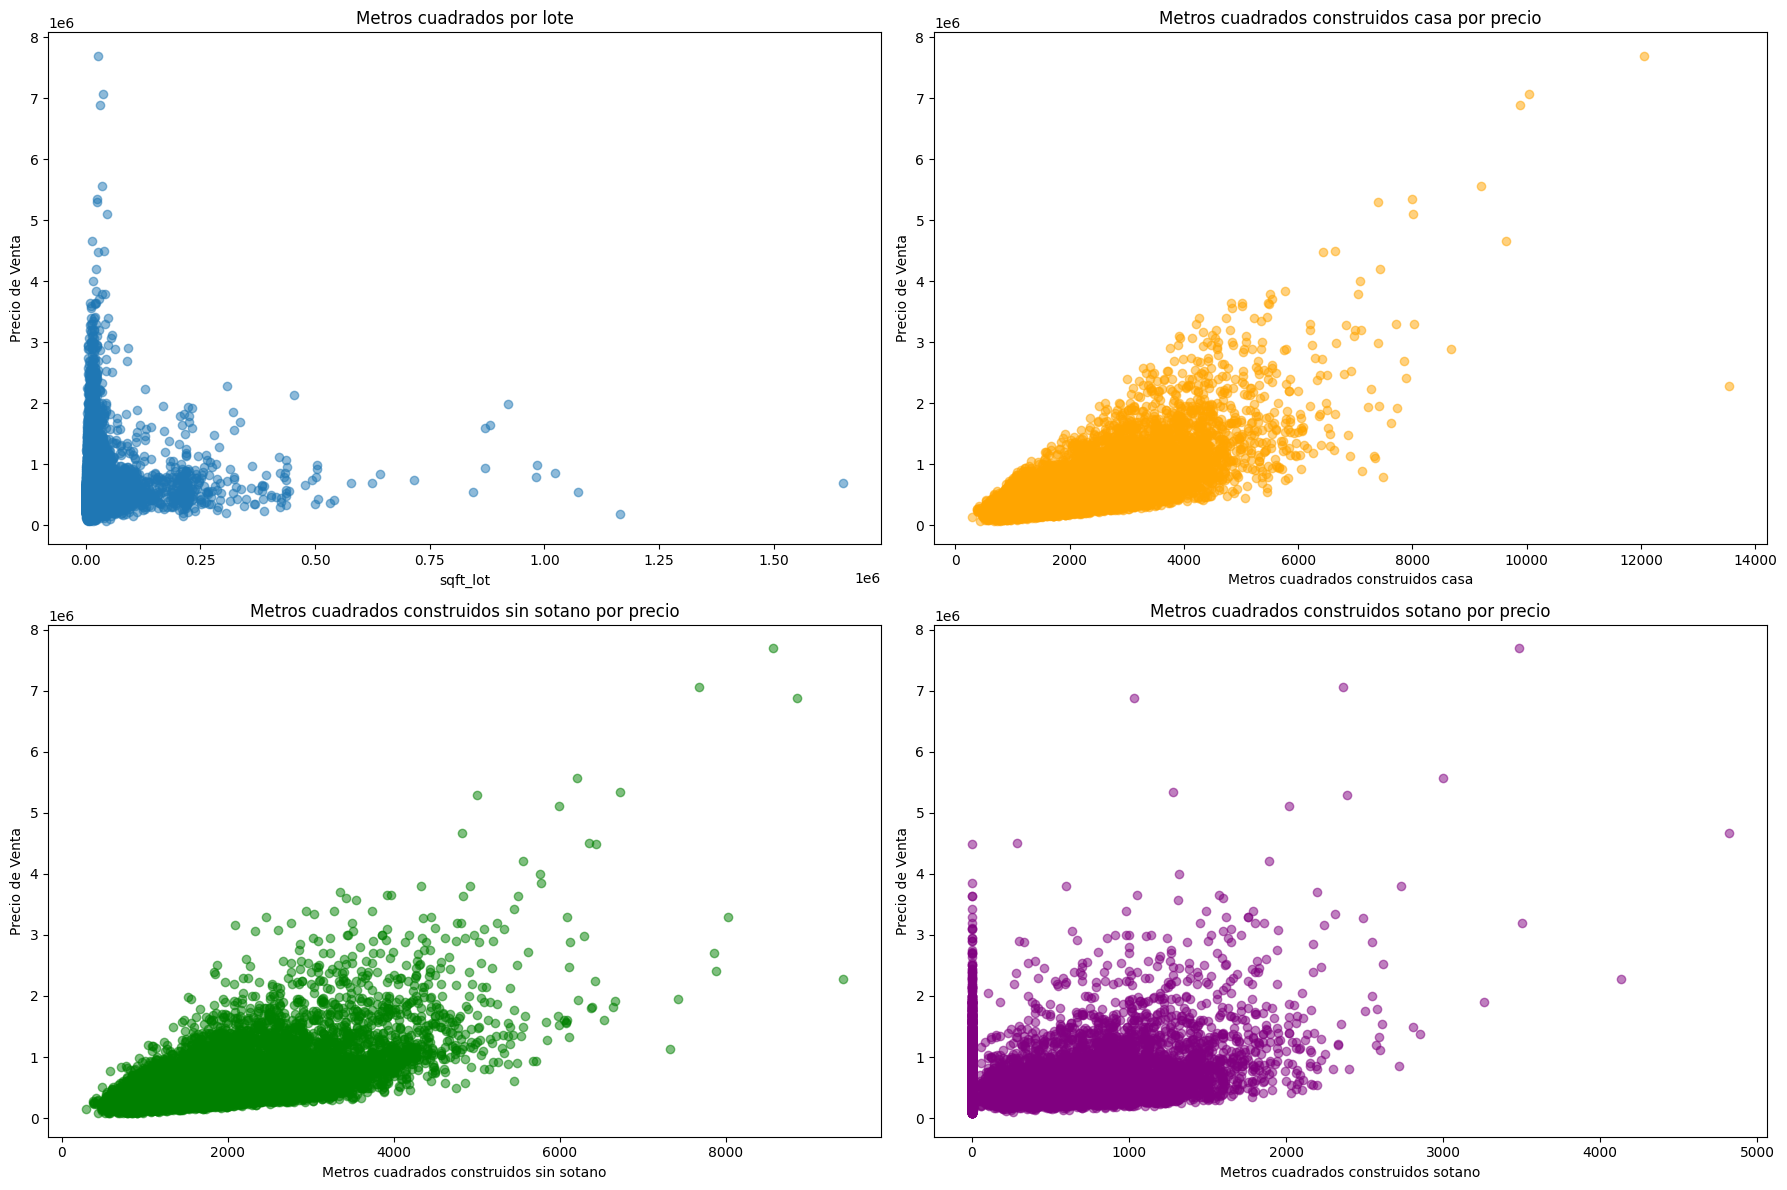

In [14]:
#dimension del grafico
fig, axs = plt.subplots(2, 2, figsize=(18, 12))


axs[0, 0].scatter(df['sqft_lot'], df['price'], alpha=0.5)
axs[0, 0].set_title('Metros cuadrados por lote')
axs[0, 0].set_xlabel('sqft_lot')
axs[0, 0].set_ylabel('Precio de Venta')


axs[0, 1].scatter(df['sqft_living'], df['price'], alpha=0.5, color='orange')
axs[0, 1].set_title('Metros cuadrados construidos casa por precio')
axs[0, 1].set_xlabel('Metros cuadrados construidos casa')
axs[0, 1].set_ylabel('Precio de Venta')


axs[1, 0].scatter(df['sqft_above'], df['price'], alpha=0.5, color='green')
axs[1, 0].set_title('Metros cuadrados construidos sin sotano por precio')
axs[1, 0].set_xlabel('Metros cuadrados construidos sin sotano')
axs[1, 0].set_ylabel('Precio de Venta')


axs[1, 1].scatter(df['sqft_basement'], df['price'], alpha=0.5, color='purple')
axs[1, 1].set_title('Metros cuadrados construidos sotano por precio')
axs[1, 1].set_xlabel('Metros cuadrados construidos sotano')
axs[1, 1].set_ylabel('Precio de Venta')

plt.tight_layout()
plt.show()

Los metros cuadrados construidos de las casas (incluyendo y excluyendo el sótano) parecen tener una relación positiva más clara con el precio de la propiedad.
El tamaño del lote no muestra una relación clara y directa con el precio, indicando que no es un factor determinante principal.


#Seaborn


###Boxplot

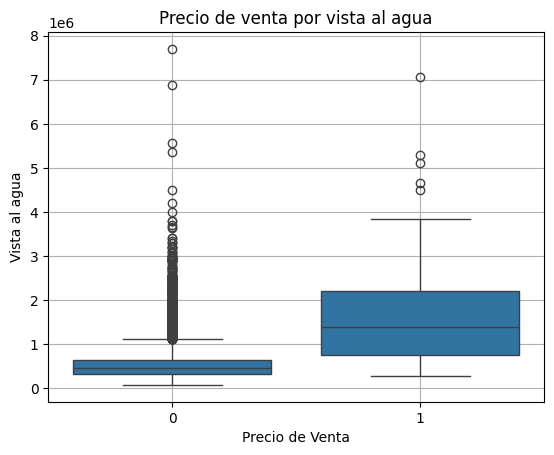

In [15]:
#Boxplot Precio de venta por vista al agua
sns.boxplot(x = 'waterfront',  y = 'price', data = df)
plt.title('Precio de venta por vista al agua')
plt.xlabel('Precio de Venta')
plt.ylabel('Vista al agua')
plt.grid(True)
plt.show()

La mayoría de los precios están concentrados en la parte inferior del gráfico, indicando que las propiedades sin vista al agua suelen ser más baratas.Hay muchos valores atípicos (outliers) que alcanzan precios mucho más altos, pero estos son menos comunes.
El precio de las propiedades con vista al agua es notablemente más alto en comparación con las propiedades sin vista al agua.La mediana del precio es considerablemente más alta.
Aunque también hay valores atípicos, estos son menos frecuentes en comparación con las propiedades sin vista al agua.

###Scatterplot

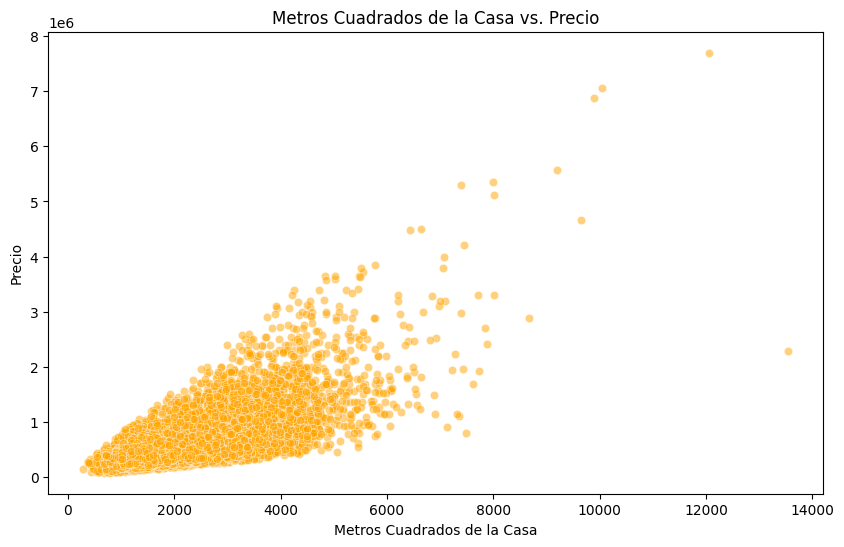

In [16]:
# Gráfico de dispersión para precio vs. metros cuadrados de la vivienda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5, color='orange')
plt.title('Metros Cuadrados de la Casa vs. Precio')
plt.xlabel('Metros Cuadrados de la Casa')
plt.ylabel('Precio')
plt.show()

Este gráfico de dispersión muestra la relación entre los metros cuadrados de la casa y el precio. Similar al empleado con matplotlib.



###Barplot

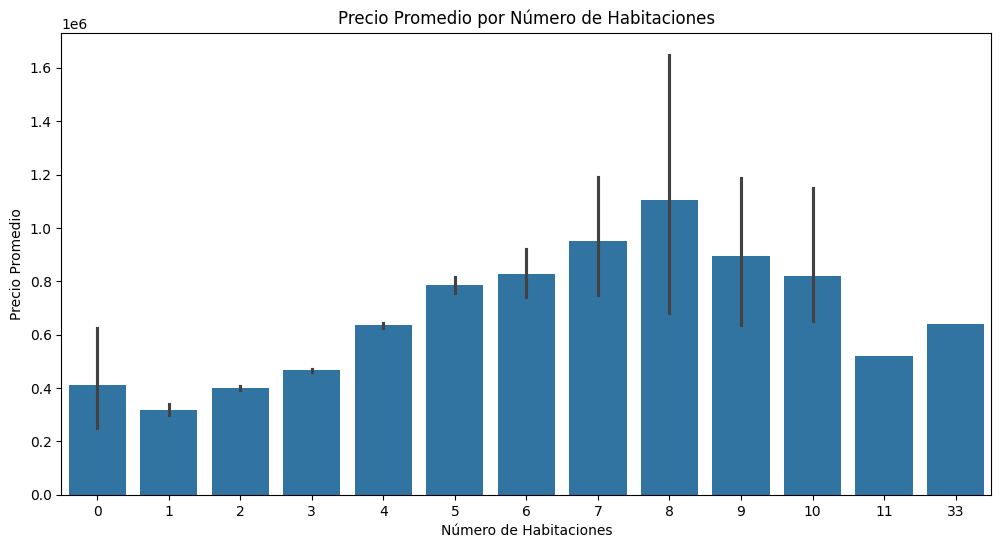

In [17]:
# Gráfico de barras para precios por número de habitaciones
plt.figure(figsize=(12, 6))
sns.barplot(x='bedrooms', y='price', data=df)
plt.title('Precio Promedio por Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio Promedio')
plt.show()

 A medida que aumenta el número de habitaciones, el precio promedio de las casas también tiende a aumentar. Por lo tanto, las casas con más habitaciones tienden a ser más caras. Asimismo, si bien hay un aumento general en el precio promedio con el número de habitaciones, la variación en los precios no es tan pronunciada como podría esperarse en comparacion con los graficos de metros cuadrados de la casa.